In [700]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pkg_resources
import subprocess
import sys
import os

REQUIRED = {
  'spacy', 'scikit-learn', 'numpy', 'pandas', 'torch', 
  'pyfunctional', 'textblob', 'seaborn', 'matplotlib'
}

installed = {pkg.key for pkg in pkg_resources.working_set}
missing = REQUIRED - installed


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import seaborn

from numpy import log, mean
from pandas import Series, DataFrame

from typing import List, Tuple, Union
import glob

!pip install pyfunctional

from functional import seq
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

import spacy

from IPython.display import clear_output

!pip install textstat
from textstat.textstat import *

from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold

import pandas as panda
import re 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS

import seaborn as sns 

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, Dropout, BatchNormalization
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from gensim.models import Word2Vec

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove-text/glove.6B.50d.txt
/kaggle/input/hate-speech-and-profanity-dataset/hatespeech dataset.csv


**Importing Data**

In [701]:
dataset = pd.read_csv('../input/hate-speech-and-profanity-dataset/hatespeech dataset.csv') 
dataset.columns

Index(['No', 'Tweets', 'Hatespeech', 'Profanity'], dtype='object')

In [702]:
dataset

,No,Tweets,Hatespeech,Profanity
0,1,@scotteeedogg No.... *innocent look*,0,0
1,2,@WeAreMel @ANGELAWHITE Spectacular scene,0,0
2,3,Growing Pains - Ludacris,0,0
3,4,@DanaMessner @jeremydvid Wait what!?!??!?,0,0
4,5,To travel or not... that is the question,0,0
...,...,...,...,...
1492,1493,"Finished my Cowboy Bebop re-watch. Last time was 10 years ago when I was living in Japan. Of course, still a masterpiece. And that final showdown... I want to play that. Such a beautiful use of mu...",0,0
1493,1494,Just posted a photo @ Stand Up Live - Phoenix https://t.co/9xHw7AMhbT,0,0
1494,1495,@RealCapnCrunch I love the crunch crunch crunch sound ?? #CapnCrunchSweater #Sweepstakes,0,0
1495,1496,"@1965_superfly @CodeMonkeyZ Audited by who? I assume you mean a financial audit but that wouldn’t hold true. Goods in transit are included. Also, why did y’all have truckloads of goods that wer...",0,0


In [703]:
dataset['Label'] = dataset['Hatespeech']*2 + dataset['Profanity']

dataset

,No,Tweets,Hatespeech,Profanity,Label
0,1,@scotteeedogg No.... *innocent look*,0,0,0
1,2,@WeAreMel @ANGELAWHITE Spectacular scene,0,0,0
2,3,Growing Pains - Ludacris,0,0,0
3,4,@DanaMessner @jeremydvid Wait what!?!??!?,0,0,0
4,5,To travel or not... that is the question,0,0,0
...,...,...,...,...,...
1492,1493,"Finished my Cowboy Bebop re-watch. Last time was 10 years ago when I was living in Japan. Of course, still a masterpiece. And that final showdown... I want to play that. Such a beautiful use of mu...",0,0,0
1493,1494,Just posted a photo @ Stand Up Live - Phoenix https://t.co/9xHw7AMhbT,0,0,0
1494,1495,@RealCapnCrunch I love the crunch crunch crunch sound ?? #CapnCrunchSweater #Sweepstakes,0,0,0
1495,1496,"@1965_superfly @CodeMonkeyZ Audited by who? I assume you mean a financial audit but that wouldn’t hold true. Goods in transit are included. Also, why did y’all have truckloads of goods that wer...",0,0,0


In [704]:
dataset[dataset['Hatespeech'] == 1].head(10)

,No,Tweets,Hatespeech,Profanity,Label
11,12,Is it just me but have y’all ever talk to a nigga and they invite you over right away. I always think it be a set up but still go????????????????,1,1,3
17,18,@klaasm67 Fucking bitch!!!,1,1,3
25,26,@JCTHESUPREME @lilbronxbmbr @sportsisfamily3 @ahmed55576 @JoeyRuble @ShannonSharpe Yea but it would change the overall fact that at similar attempts he is getting outplayed by Scary Terry. You are...,1,0,2
41,42,@MattyBrault @FerrisBaller1 @PhilHay_ And you think you know ? Referees rarely give penalties when you don’t go to ground . He stayed on his feet and shot towards goal . It would have been a penal...,1,1,3
43,44,thinking abt how the US government has millions of dollars to hand out for state lottery prizes but can’t put together a second stimulus package ...,1,0,2
49,50,Throat babyyyyy????,1,0,2
50,51,Not him posting that he wants a girl whenever all he did was cheat??????????????,1,0,2
54,55,Tasha don’t trust them #POWERTV,1,0,2
60,61,God really saw me live alone in a hotel eating chipotle everyday for months and decided I deserved to have three 10 page essays due back to back what the fuck https://t.co/x4a7YsvWEA,1,1,3
62,63,im literally gonna KMS,1,0,2


In [705]:
dataset[dataset['Profanity'] == 1].head(10)

,No,Tweets,Hatespeech,Profanity,Label
11,12,Is it just me but have y’all ever talk to a nigga and they invite you over right away. I always think it be a set up but still go????????????????,1,1,3
13,14,@tiffanyyrenea I be thinking I look them niggas til I record my joint... I look like this ?? https://t.co/B8toKnpnui,0,1,1
16,17,Lol y’all sweet af,0,1,1
17,18,@klaasm67 Fucking bitch!!!,1,1,3
22,23,@louiestark7 @JHungXXX God dam this is sexy as fuck,0,1,1
37,38,This shit made me cry https://t.co/3NiNyDvv6K,0,1,1
39,40,they rly used to bully niggas for being smart ???? like “oh haha what a loser his brain is huge he’s going places in life lmfao what a dweeb I can’t believe you want to be a scientist”,0,1,1
41,42,@MattyBrault @FerrisBaller1 @PhilHay_ And you think you know ? Referees rarely give penalties when you don’t go to ground . He stayed on his feet and shot towards goal . It would have been a penal...,1,1,3
45,46,Bouta fall asleep waiting for my food to come from DoorDash cuz GODAMNNN,0,1,1
56,57,damn that red lobster hitting smh,0,1,1


In [706]:
dataset.tail(10)

,No,Tweets,Hatespeech,Profanity,Label
1487,1488,i really put 2 &amp; 2 together and be right. we not the same ??,0,0,0
1488,1489,"Unprecedented aircraft movement in the last 10 days, 4 X the average, especially tonight, Sat night.??\n\nMonkey Werks talks about lots of aircraft moving a lot of troops just outside of Las Vegas...",0,0,0
1489,1490,Proving again that drunk or sober Matt Gaetz is a flaming asshole.\n'You are not welcome in New Jersey': Governor slams Rep. Gaetz for attending maskless Republican gala https://t.co/9Fc8BYJ2uj vi...,1,1,3
1490,1491,"Mount Washington,NH (MWN) ASOS reports gust of 73 knots (84.0 mph) from NW @ 0756Z -- KMWN 060756Z 32058G73KT 1/16SM SN BLSN FZFG VV001 M15/M15 RMK VRY LGT ICG",0,0,0
1491,1492,"literally, I say this all the time. pickle all my shit https://t.co/zhgRZ06n1H",0,1,1
1492,1493,"Finished my Cowboy Bebop re-watch. Last time was 10 years ago when I was living in Japan. Of course, still a masterpiece. And that final showdown... I want to play that. Such a beautiful use of mu...",0,0,0
1493,1494,Just posted a photo @ Stand Up Live - Phoenix https://t.co/9xHw7AMhbT,0,0,0
1494,1495,@RealCapnCrunch I love the crunch crunch crunch sound ?? #CapnCrunchSweater #Sweepstakes,0,0,0
1495,1496,"@1965_superfly @CodeMonkeyZ Audited by who? I assume you mean a financial audit but that wouldn’t hold true. Goods in transit are included. Also, why did y’all have truckloads of goods that wer...",0,0,0
1496,1497,"And outdoor #7footApart activities, like #7footApartHikes available to people, especially active Sr.s &amp;\n50+ more at risk pop. who\nkeep health UP by being safe distance APART outside...low ri...",0,0,0


**Processing Tweets**

In [707]:
tweet = dataset.Tweets

## 1. Removal of punctuation and capitlization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming

stopwords = nltk.corpus.stopwords.words("english")

#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

def preprocess(tweet):  
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')

    # removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    # removal of links[https://abc.com]
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    
    # removal of punctuations and numbers
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    # remove whitespace with a single space
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    tweet_lower = newtweet.str.lower()
    
    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    
    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

processed_tweets = preprocess(tweet) 

dataset['Processed Tweets'] = processed_tweets
dataset[["Tweets","Processed Tweets", "Hatespeech", "Profanity"]].tail(10)

,Tweets,Processed Tweets,Hatespeech,Profanity
1487,i really put 2 &amp; 2 together and be right. we not the same ??,realli put amp togeth right,0,0
1488,"Unprecedented aircraft movement in the last 10 days, 4 X the average, especially tonight, Sat night.??\n\nMonkey Werks talks about lots of aircraft moving a lot of troops just outside of Las Vegas...",unpreced aircraft movement last day x averag especi tonight sat night monkey werk talk lot aircraft move lot troop outsid la vega right recommend watch,0,0
1489,Proving again that drunk or sober Matt Gaetz is a flaming asshole.\n'You are not welcome in New Jersey': Governor slams Rep. Gaetz for attending maskless Republican gala https://t.co/9Fc8BYJ2uj vi...,prove drunk sober matt gaetz flame asshol welcom new jersey governor slam rep gaetz attend maskless republican gala via,1,1
1490,"Mount Washington,NH (MWN) ASOS reports gust of 73 knots (84.0 mph) from NW @ 0756Z -- KMWN 060756Z 32058G73KT 1/16SM SN BLSN FZFG VV001 M15/M15 RMK VRY LGT ICG",mount washington nh mwn aso report gust knot mph nw z kmwn z g kt sm sn blsn fzfg vv rmk vri lgt icg,0,0
1491,"literally, I say this all the time. pickle all my shit https://t.co/zhgRZ06n1H",liter say time pickl shit,0,1
1492,"Finished my Cowboy Bebop re-watch. Last time was 10 years ago when I was living in Japan. Of course, still a masterpiece. And that final showdown... I want to play that. Such a beautiful use of mu...",finish cowboy bebop watch last time year ago live japan cours still masterpiec final showdown want play beauti use music cinematographi theme,0,0
1493,Just posted a photo @ Stand Up Live - Phoenix https://t.co/9xHw7AMhbT,post photo stand live phoenix,0,0
1494,@RealCapnCrunch I love the crunch crunch crunch sound ?? #CapnCrunchSweater #Sweepstakes,love crunch crunch crunch sound capncrunchsweat sweepstak,0,0
1495,"@1965_superfly @CodeMonkeyZ Audited by who? I assume you mean a financial audit but that wouldn’t hold true. Goods in transit are included. Also, why did y’all have truckloads of goods that wer...",audit assum mean financi audit hold true good transit includ also truckload good inventori ever happen run also none appli vote audit,0,0
1496,"And outdoor #7footApart activities, like #7footApartHikes available to people, especially active Sr.s &amp;\n50+ more at risk pop. who\nkeep health UP by being safe distance APART outside...low ri...",outdoor footapart activ like footaparthik avail peopl especi activ sr amp risk pop keep health safe distanc apart outsid low risk activ like san diego day hiker com also safe restroom ndd pk trl,0,0


**Word Clouds**

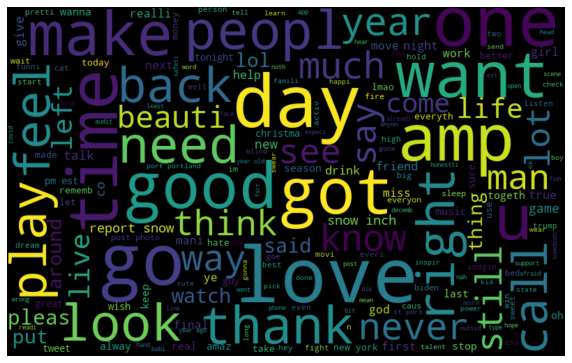

In [708]:
from wordcloud import WordCloud

hatred_words = ' '.join([text for text in dataset['Processed Tweets'][dataset['Label'] == 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(hatred_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

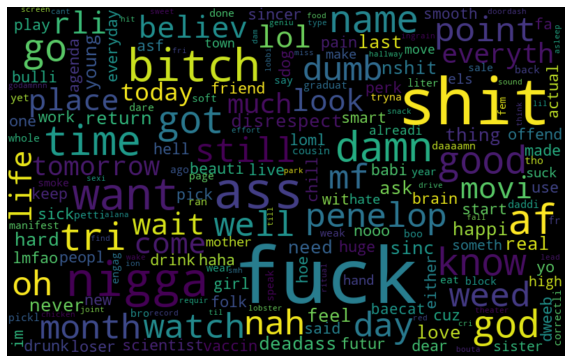

In [709]:
from wordcloud import WordCloud

hatred_words = ' '.join([text for text in dataset['Processed Tweets'][dataset['Label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(hatred_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

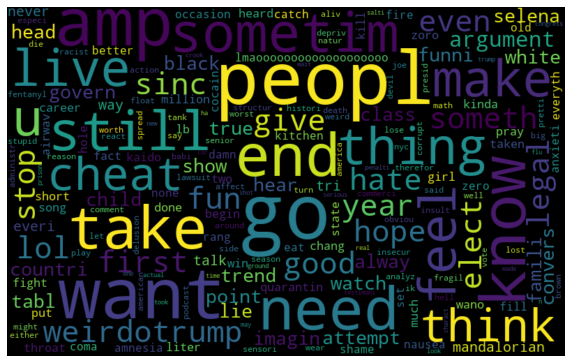

In [710]:
from wordcloud import WordCloud

hatred_words = ' '.join([text for text in dataset['Processed Tweets'][dataset['Label'] == 2]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(hatred_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

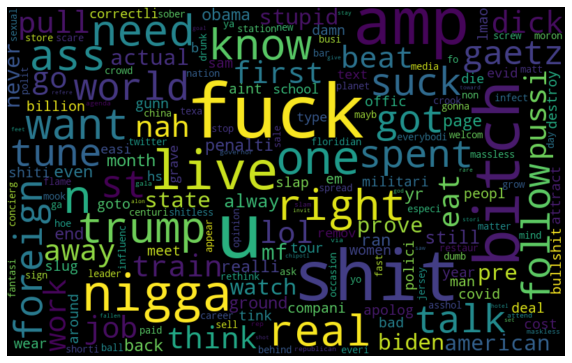

In [711]:
from wordcloud import WordCloud

hatred_words = ' '.join([text for text in dataset['Processed Tweets'][dataset['Label'] == 3]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(hatred_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**Target of Hatespeech**

In [712]:
!python -m spacy download en_core_web_md & >/dev/null
nlp = spacy.load("en_core_web_sm")

In [713]:
def log_LhArr(src_arr: Series, ref_arr: Series):
  """
  Vectorized log-likelihood test.
  
  Parameters:
  -----------
  - src_arr: sum of tokens across all documents in the source group. Shape (1, n)
  - ref_arr: sum of tokens across all documents in the reference group. Shape (1, n)
  
  Order in which parameters are passed does not affect the results.
  """
  src_count: int = src_arr.sum()
  ref_count: int = ref_arr.sum()
  
  agg = (src_arr + ref_arr) / (src_count + ref_count)
  e1 = src_count * agg
  e2 = ref_count * agg
  
  p1 = src_arr * log(src_arr / e1)
  p2 = ref_arr * log(ref_arr / e2)

  return 2 * (p1 + p2)
  
  
def topWordsByLogLikelihood(
  docWordMatrix: DataFrame, 
  labels: List[str], 
  topN: int) -> Tuple[Series, Series]:
  """
  Prints top words sorted by log likelihood test. 
  Assumes matrix is binary (only 2 labels).
  """
  label1, label2 = set(labels)
  
  aggDf = docWordMatrix.assign(label=labels).groupby('label').sum().T
  
  aggDf = aggDf.assign(
    # difference between token counts in both categories.
    # needed to separate key tokens in each category. 
    l1Diff = aggDf[label1] - aggDf[label2], 
    l2Diff = aggDf[label2] - aggDf[label1],
    # likelihood of all tokens
    # is the likelihood of observing 'this' token in group A significantly different from B
    likelihood = log_LhArr(aggDf[label1].replace(0, 0.01), aggDf[label2].replace(0, 0.01))
  )
  
  # boolean masks to select tokens in each category
  label1_i = aggDf['l1Diff'] > 0
  label2_i = aggDf['l1Diff'] < 0
  
  l1 = aggDf[label1_i].sort_values(by='likelihood', ascending=False)[:topN]['likelihood']
  l2 = aggDf[label2_i].sort_values(by='likelihood', ascending=False)[:topN]['likelihood']
  
  print(f"\nTop tokens without any Hatespeech by likelihood:\n")
  print(l1)

  print(f"\nTop tokens with Hatespeech by likelihood:\n")
  print(l2)
  
  return (l1, l2)

def hateTokenizer(text: str, spacyModel=nlp):
  """
  Simple tokenizer to:
    - extract alphabetical tokens
    - remove stopwords
    - lemmatize and lowercase tokens 
  """
  doc = spacyModel(text)
  
  return seq(token for token in doc)\
    .filter(lambda t: t.is_alpha)\
    .filter_not(lambda t: t.is_stop)\
    .map(lambda t: t.lemma_.lower())\
    .to_list()

def rawCorpusToDf(
  corpus: Union[List[str], Series], 
  tokenizer=hateTokenizer, 
  idf=False) -> DataFrame:
  """Tokenize corpus and build doc-term matrix."""
  vectorizer = (
    TfidfVectorizer(tokenizer=tokenizer, lowercase=False) 
    if idf else
    CountVectorizer(tokenizer=tokenizer, lowercase=False)
  )

  X = vectorizer.fit_transform(corpus)

  return pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

count_df = rawCorpusToDf(dataset['Tweets'])

In [714]:
l1, l2 = topWordsByLogLikelihood(count_df, dataset['Hatespeech'].tolist(), 10)


Top tokens without any Hatespeech by likelihood:

love      19.944339
shit      14.794749
amp       12.756116
thank     10.090176
n          8.416230
report     8.266764
co         7.902184
night      7.537645
live       7.455702
snow       6.808708
Name: likelihood, dtype: float64

Top tokens with Hatespeech by likelihood:

bitch           17.874677
cheat           17.756315
away            14.181378
penalty         14.181378
occasionally    14.181378
argument        14.181378
crook           14.181378
gaetz           14.181378
foreign         14.181378
ground          14.181378
Name: likelihood, dtype: float64


In [715]:
def topWordsByLogLikelihood(
  docWordMatrix: DataFrame, 
  labels: List[str], 
  topN: int) -> Tuple[Series, Series]:
  """
  Prints top words sorted by log likelihood test. 
  Assumes matrix is binary (only 2 labels).
  """
  label1, label2 = set(labels)
  
  aggDf = docWordMatrix.assign(label=labels).groupby('label').sum().T
  
  aggDf = aggDf.assign(
    # difference between token counts in both categories.
    # needed to separate key tokens in each category. 
    l1Diff = aggDf[label1] - aggDf[label2], 
    l2Diff = aggDf[label2] - aggDf[label1],
    # likelihood of all tokens
    # is the likelihood of observing 'this' token in group A significantly different from B
    likelihood = log_LhArr(aggDf[label1].replace(0, 0.01), aggDf[label2].replace(0, 0.01))
  )
  
  # boolean masks to select tokens in each category
  label1_i = aggDf['l1Diff'] > 0
  label2_i = aggDf['l1Diff'] < 0
  
  l1 = aggDf[label1_i].sort_values(by='likelihood', ascending=False)[:topN]['likelihood']
  l2 = aggDf[label2_i].sort_values(by='likelihood', ascending=False)[:topN]['likelihood']
  
  print(f"\nTop tokens without any Profanity by likelihood:\n")
  print(l1)

  print(f"\nTop tokens with Profanity by likelihood:\n")
  print(l2)
  
  return (l1, l2)

l1, l2 = topWordsByLogLikelihood(count_df, dataset['Profanity'].tolist(), 10)


Top tokens without any Profanity by likelihood:

thank     8.764720
damn      7.570915
way       7.495641
report    7.178452
live      7.023613
co        6.861300
night     6.544190
snow      5.910111
est       5.910111
try       5.678186
Name: likelihood, dtype: float64

Top tokens with Profanity by likelihood:

fuck         125.381720
shit          95.879006
bitch         68.851785
ass           42.959828
niggas        28.325641
nigga         22.861399
dumb          17.582585
af            17.582585
correctly     15.200775
foreign       15.200775
Name: likelihood, dtype: float64


In [716]:
hateText = dataset[dataset['Hatespeech'] == 1]['Tweets'].str.lower()
docs = list(nlp.pipe(hateText, disable=["ner", "textcat"]))

profaneText = dataset[dataset['Profanity'] == 1]['Tweets'].str.lower()
docs1 = list(nlp.pipe(profaneText, disable=["ner", "textcat"]))

In [717]:
# possible dependency tags
# dobj, nsubj, nsubjpass

nouns = set([token.lemma_ 
  for doc in docs
  for token in doc
  if token.dep_ == 'nsubj' and not token.is_stop and len(token) > 2
])

In [718]:
pairs = [(hateText.str.contains(nn).sum(), nn) for nn in nouns]
targetsDf = pd.DataFrame(pairs, columns=["Sentence Count", "Hate Target Token"])

In [719]:
def cleanDfText(df, col_remove='target', col_sort='sentence_count', show=20):
  """
  Utility function to remove words from a column, 1 by 1. Function asks user 
  what word to remove, the new dataframe without the word is printed and the loop repeats.
  
  Parameters:
  -----------
  - df: Pandas Dataframe.
  - col_remove: the column with possible words to remove.
  - col_sort: numerical column to sort by after each loop.
  - show: dataframe number of items to display after each loop.
  """
  newDf = df.copy()
  removed = list()
  
  while True:
    word = input("Word to remove (enter 'q' to exit):")
    
    if word == 'q':
      return removed, newDf
      
    newDf = newDf[newDf[col_remove] != word]\
              .sort_values(by=col_sort, ascending=False)\
              .reset_index(drop=True)
    
    removed.append(word)
    clear_output(wait=True)
    print(newDf.head(show))
    
    # clear Jupyter notebook input/output
    In.clear()
    Out.clear()

In [720]:
toRemove = ['er']

targetsDf[~targetsDf['Hate Target Token'].str.contains("|".join(toRemove))]\
  .sort_values(by="Sentence Count", ascending=False)\
  .reset_index(drop=True).head(15)

,Sentence Count,Hate Target Token
0,23,trump
1,16,ass
2,13,people
3,13,man
4,11,bitch
5,11,thing
6,9,@realdonaldtrump
7,7,nigga
8,6,dem
9,5,joe


**Hashtags**

In [721]:
def hashtag_extract(x):
    hashtags = []    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [722]:
HT_regular = hashtag_extract(dataset['Tweets']) 
HT_negative = hashtag_extract(dataset['Tweets'][dataset['Profanity'] == 1]) 

HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])

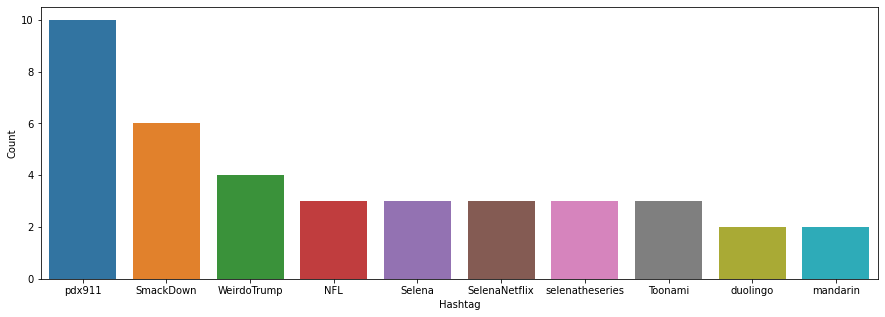

In [723]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    }
) 

# selecting top 20 most frequent hashtags

d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(15,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
# plt.xticks(rotation=90)
plt.show()

**Bag of Words**

In [724]:
#bag-of-words

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(dataset['Processed Tweets'])

In [725]:
X = bow
y = dataset['Hatespeech'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)
hate_acc=accuracy_score(y_test,y_preds)
print("Logistic Regression with Bag of Words to detect the presence of Hatespeech, Accuracy Score:" , hate_acc)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       259
           1       0.64      0.22      0.33        41

    accuracy                           0.88       300
   macro avg       0.77      0.60      0.63       300
weighted avg       0.85      0.88      0.85       300

Logistic Regression with Bag of Words to detect the presence of Hatespeech, Accuracy Score: 0.8766666666666667


In [726]:
X = bow
y = dataset['Profanity'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)
pro_acc=accuracy_score(y_test,y_preds)
print("Logistic Regression with Bag of Words to detect the presence of Profanity, Accuracy Score:" , pro_acc)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       263
           1       0.94      0.46      0.62        37

    accuracy                           0.93       300
   macro avg       0.94      0.73      0.79       300
weighted avg       0.93      0.93      0.92       300

Logistic Regression with Bag of Words to detect the presence of Profanity, Accuracy Score: 0.93


In [727]:
X = bow
y = dataset['Hatespeech'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

rf=RandomForestClassifier(max_depth=6, n_estimators=10, random_state=0)

rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
hate_acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest with Bag of Words to detect the presence of Hatespeech, Accuracy Score:",hate_acc1)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       259
           1       0.00      0.00      0.00        41

    accuracy                           0.86       300
   macro avg       0.43      0.50      0.46       300
weighted avg       0.75      0.86      0.80       300

Random Forest with Bag of Words to detect the presence of Hatespeech, Accuracy Score: 0.8633333333333333


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [728]:
X = bow
y = dataset['Profanity'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
pro_acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest with Bag of Words to detect the presence of Profanity, Accuracy Score:",pro_acc1)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       263
           1       0.91      0.78      0.84        37

    accuracy                           0.96       300
   macro avg       0.94      0.89      0.91       300
weighted avg       0.96      0.96      0.96       300

Random Forest with Bag of Words to detect the presence of Profanity, Accuracy Score: 0.9633333333333334


In [729]:
X = bow
y = dataset['Hatespeech'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_tfidf,y_train)
y_preds = nb.predict(X_test_tfidf)
hate_acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes with Bag of Words to detect the presence of Hatespeech, Accuracy Score:",hate_acc2)

              precision    recall  f1-score   support

           0       0.89      0.69      0.77       259
           1       0.18      0.44      0.26        41

    accuracy                           0.65       300
   macro avg       0.53      0.56      0.52       300
weighted avg       0.79      0.65      0.70       300

Naive Bayes with Bag of Words to detect the presence of Hatespeech, Accuracy Score: 0.6533333333333333


In [730]:
X = bow
y = dataset['Profanity'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_tfidf,y_train)
y_preds = nb.predict(X_test_tfidf)
pro_acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes with Bag of Words to detect the presence of Profanity, Accuracy Score:",pro_acc2)

              precision    recall  f1-score   support

           0       0.90      0.73      0.80       263
           1       0.17      0.41      0.24        37

    accuracy                           0.69       300
   macro avg       0.53      0.57      0.52       300
weighted avg       0.81      0.69      0.73       300

Naive Bayes with Bag of Words to detect the presence of Profanity, Accuracy Score: 0.6866666666666666


In [731]:
X = bow
y = dataset['Hatespeech'].astype(int)
support =LinearSVC(random_state=20)
support.fit(X_train_tfidf,y_train)
y_preds = support.predict(X_test_tfidf)
hate_acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM with Bag of Words to detect the presence of Hatespeech, Accuracy Score:" , hate_acc3)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       263
           1       0.90      0.73      0.81        37

    accuracy                           0.96       300
   macro avg       0.93      0.86      0.89       300
weighted avg       0.96      0.96      0.95       300

SVM with Bag of Words to detect the presence of Hatespeech, Accuracy Score: 0.9566666666666667


In [732]:
X = bow
y = dataset['Profanity'].astype(int)
support =LinearSVC(random_state=20)
support.fit(X_train_tfidf,y_train)
y_preds = support.predict(X_test_tfidf)
pro_acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM with Bag of Words to detect the presence of Profanity, Accuracy Score:" , pro_acc3)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       263
           1       0.90      0.73      0.81        37

    accuracy                           0.96       300
   macro avg       0.93      0.86      0.89       300
weighted avg       0.96      0.96      0.95       300

SVM with Bag of Words to detect the presence of Profanity, Accuracy Score: 0.9566666666666667


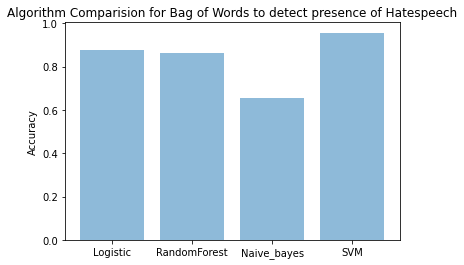

In [733]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [hate_acc,hate_acc1,hate_acc2,hate_acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for Bag of Words to detect presence of Hatespeech')
plt.show()

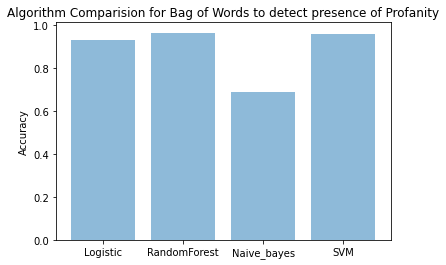

In [734]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [pro_acc,pro_acc1,pro_acc2,pro_acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for Bag of Words to detect presence of Profanity')
plt.show()

**TF-IDF**

In [735]:
#TF-IDF Features-F1
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(dataset['Processed Tweets'] )
tfidf

<1497x511 sparse matrix of type '<class 'numpy.float64'>'
	with 5728 stored elements in Compressed Sparse Row format>

In [736]:
# If you don't specify the random_state in the code, 
# then every time you run(execute) your code a new random value is generated 
# and the train and test datasets would have different values each time.
X = tfidf
y = dataset['Hatespeech'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)
hate_acc=accuracy_score(y_test,y_preds)
print("Logistic Regression with TF-IDF to detect the presence of Hatespeech, Accuracy Score:" , hate_acc)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       259
           1       0.00      0.00      0.00        41

    accuracy                           0.86       300
   macro avg       0.43      0.50      0.46       300
weighted avg       0.75      0.86      0.80       300

Logistic Regression with TF-IDF to detect the presence of Hatespeech, Accuracy Score: 0.8633333333333333


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [737]:
X = tfidf
y = dataset['Profanity'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)
pro_acc=accuracy_score(y_test,y_preds)
print("Logistic Regression with TF-IDF to detect the presence of Profanity, Accuracy Score:" , pro_acc)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       263
           1       1.00      0.27      0.43        37

    accuracy                           0.91       300
   macro avg       0.95      0.64      0.69       300
weighted avg       0.92      0.91      0.89       300

Logistic Regression with TF-IDF to detect the presence of Profanity, Accuracy Score: 0.91


In [738]:
X = tfidf
y = dataset['Hatespeech'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
hate_acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest with TF-IDF to detect the presence of Hatespeech, Accuracy Score:",hate_acc1)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       259
           1       0.79      0.27      0.40        41

    accuracy                           0.89       300
   macro avg       0.84      0.63      0.67       300
weighted avg       0.88      0.89      0.87       300

Random Forest with TF-IDF to detect the presence of Hatespeech, Accuracy Score: 0.89


In [739]:
X = tfidf
y = dataset['Profanity'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
pro_acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest with TF-IDF to detect the presence of Profanity, Accuracy Score:",pro_acc1)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       263
           1       0.90      0.73      0.81        37

    accuracy                           0.96       300
   macro avg       0.93      0.86      0.89       300
weighted avg       0.96      0.96      0.95       300

Random Forest with TF-IDF to detect the presence of Profanity, Accuracy Score: 0.9566666666666667


In [740]:
X = tfidf
y = dataset['Hatespeech'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_tfidf,y_train)
y_preds = nb.predict(X_test_tfidf)
hate_acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes with TF-IDF to detect the presence of Hatespeech, Accuracy Score:",hate_acc2)

              precision    recall  f1-score   support

           0       0.89      0.60      0.72       259
           1       0.18      0.54      0.27        41

    accuracy                           0.59       300
   macro avg       0.53      0.57      0.49       300
weighted avg       0.79      0.59      0.66       300

Naive Bayes with TF-IDF to detect the presence of Hatespeech, Accuracy Score: 0.5933333333333334


In [741]:
X = tfidf
y = dataset['Profanity'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_tfidf,y_train)
y_preds = nb.predict(X_test_tfidf)
pro_acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes with TF-IDF to detect the presence of Profanity, Accuracy Score:",pro_acc2)

              precision    recall  f1-score   support

           0       0.90      0.65      0.76       263
           1       0.16      0.46      0.23        37

    accuracy                           0.63       300
   macro avg       0.53      0.56      0.50       300
weighted avg       0.80      0.63      0.69       300

Naive Bayes with TF-IDF to detect the presence of Profanity, Accuracy Score: 0.63


In [742]:
X = tfidf
y = dataset['Hatespeech'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
support =LinearSVC(random_state=20)
support.fit(X_train_tfidf,y_train)
y_preds = support.predict(X_test_tfidf)
hate_acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM with TF-IDF to detect the presence of Hatespeech, Accuracy Score:" , hate_acc3)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       259
           1       0.55      0.15      0.23        41

    accuracy                           0.87       300
   macro avg       0.71      0.56      0.58       300
weighted avg       0.83      0.87      0.83       300

SVM with TF-IDF to detect the presence of Hatespeech, Accuracy Score: 0.8666666666666667


In [743]:
X = tfidf
y = dataset['Profanity'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
support =LinearSVC(random_state=20)
support.fit(X_train_tfidf,y_train)
y_preds = support.predict(X_test_tfidf)
pro_acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM with TF-IDF to detect the presence of Profanity, Accuracy Score:" , pro_acc3)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       263
           1       0.82      0.49      0.61        37

    accuracy                           0.92       300
   macro avg       0.87      0.74      0.78       300
weighted avg       0.92      0.92      0.91       300

SVM with TF-IDF to detect the presence of Profanity, Accuracy Score: 0.9233333333333333


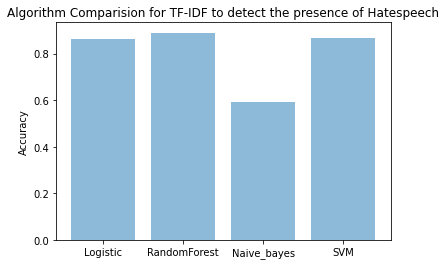

In [744]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [hate_acc,hate_acc1,hate_acc2,hate_acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for TF-IDF to detect the presence of Hatespeech')
plt.show()

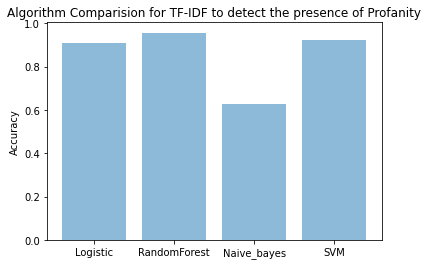

In [745]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [pro_acc,pro_acc1,pro_acc2,pro_acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for TF-IDF to detect the presence of Profanity')
plt.show()

**Sentiment Analysis**

In [746]:
sentiment_analyzer = VS()
def count_tags(tweet_c):  
    
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def sentiment_analysis(tweet):   
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    twitter_objs = count_tags(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],twitter_objs[0], twitter_objs[1],
                twitter_objs[2]]
    #features = pandas.DataFrame(features)
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

final_features = sentiment_analysis_array(tweet)
#final_features

new_features = panda.DataFrame({'Neg':final_features[:,0],'Pos':final_features[:,1],'Neu':final_features[:,2],'Compound':final_features[:,3],
                            'url_tag':final_features[:,4],'mention_tag':final_features[:,5],'hash_tag':final_features[:,6]})
new_features

,Neg,Pos,Neu,Compound,url_tag,mention_tag,hash_tag
0,0.000,0.000,1.000,0.0000,0.0,1.0,0.0
1,0.000,0.000,1.000,0.0000,0.0,2.0,0.0
2,0.509,0.309,0.182,-0.2732,0.0,0.0,0.0
3,0.000,0.000,1.000,0.0000,0.0,2.0,0.0
4,0.000,0.000,1.000,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1492,0.000,0.268,0.732,0.8934,0.0,0.0,0.0
1493,0.000,0.000,1.000,0.0000,1.0,0.0,0.0
1494,0.000,0.336,0.664,0.6767,0.0,1.0,2.0
1495,0.000,0.083,0.917,0.6199,0.0,2.0,0.0


In [747]:
# F2-Conctaenation of sentiment scores
tfidf_a = tfidf.toarray()
bow_a = bow.toarray()
modelling_features = np.concatenate([final_features],axis=1)
modelling_features.shape

(1497, 7)

In [748]:
# Running the model Using sentiment analysis

X = panda.DataFrame(modelling_features)
y = dataset['Hatespeech'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = LogisticRegression().fit(X_train_bow,y_train)
y_preds = model.predict(X_test_bow)
report = classification_report( y_test, y_preds )
print(report)
hate_acc=accuracy_score(y_test,y_preds)
print("Logistic Regression with Sentiment Analysis to detect the presence of Hatespeech, Accuracy Score:", hate_acc)

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       259
           1       0.33      0.02      0.05        41

    accuracy                           0.86       300
   macro avg       0.60      0.51      0.48       300
weighted avg       0.79      0.86      0.80       300

Logistic Regression with Sentiment Analysis to detect the presence of Hatespeech, Accuracy Score: 0.86


In [749]:
X = panda.DataFrame(modelling_features)
y = dataset['Profanity'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = LogisticRegression().fit(X_train_bow,y_train)
y_preds = model.predict(X_test_bow)
report = classification_report( y_test, y_preds )
print(report)
pro_acc=accuracy_score(y_test,y_preds)
print("Logistic Regression with Sentiment Analysis to detect the presence of Profanity, Accuracy Score:", pro_acc)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       263
           1       0.56      0.14      0.22        37

    accuracy                           0.88       300
   macro avg       0.72      0.56      0.58       300
weighted avg       0.85      0.88      0.85       300

Logistic Regression with Sentiment Analysis to detect the presence of Profanity, Accuracy Score: 0.88


In [750]:
X = panda.DataFrame(modelling_features)
y = dataset['Hatespeech'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_bow,y_train)
y_preds = rf.predict(X_test_bow)
hate_acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest with Sentiment Analysis to detect the presence of Hatespeech, Accuracy Score:",hate_acc1)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       259
           1       0.53      0.22      0.31        41

    accuracy                           0.87       300
   macro avg       0.71      0.59      0.62       300
weighted avg       0.84      0.87      0.84       300

Random Forest with Sentiment Analysis to detect the presence of Hatespeech, Accuracy Score: 0.8666666666666667


In [751]:
X = panda.DataFrame(modelling_features)
y = dataset['Profanity'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_bow,y_train)
y_preds = rf.predict(X_test_bow)
pro_acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest with Sentiment Analysis to detect the presence of Profanity, Accuracy Score:",pro_acc1)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       263
           1       0.61      0.38      0.47        37

    accuracy                           0.89       300
   macro avg       0.76      0.67      0.70       300
weighted avg       0.88      0.89      0.88       300

Random Forest with Sentiment Analysis to detect the presence of Profanity, Accuracy Score: 0.8933333333333333


In [752]:
X = panda.DataFrame(modelling_features)
y = dataset['Hatespeech'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_bow,y_train)
y_preds = nb.predict(X_test_bow)
hate_acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes with Sentiment Analysis to detect the presence of Hatespeech, Accuracy Score:",hate_acc2)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       259
           1       0.25      0.32      0.28        41

    accuracy                           0.78       300
   macro avg       0.57      0.59      0.58       300
weighted avg       0.80      0.78      0.79       300

Naive Bayes with Sentiment Analysis to detect the presence of Hatespeech, Accuracy Score: 0.78


In [753]:
X = panda.DataFrame(modelling_features)
y = dataset['Profanity'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_bow,y_train)
y_preds = nb.predict(X_test_bow)
pro_acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes with Sentiment Analysis to detect the presence of Profanity, Accuracy Score:",pro_acc2)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       263
           1       0.34      0.54      0.42        37

    accuracy                           0.82       300
   macro avg       0.64      0.70      0.66       300
weighted avg       0.86      0.82      0.83       300

Naive Bayes with Sentiment Analysis to detect the presence of Profanity, Accuracy Score: 0.8166666666666667


In [754]:
X = panda.DataFrame(modelling_features)
y = dataset['Hatespeech'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
support =LinearSVC(random_state=20)
support.fit(X_train_bow,y_train)
y_preds = support.predict(X_test_bow)
hate_acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM with Sentiment Analysis to detect the presence of Hatespeech, Accuracy Score:" , hate_acc3)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       259
           1       0.00      0.00      0.00        41

    accuracy                           0.86       300
   macro avg       0.43      0.50      0.46       300
weighted avg       0.75      0.86      0.80       300

SVM with Sentiment Analysis to detect the presence of Hatespeech, Accuracy Score: 0.8633333333333333


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [755]:
X = panda.DataFrame(modelling_features)
y = dataset['Profanity'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
support =LinearSVC(random_state=20)
support.fit(X_train_bow,y_train)
y_preds = support.predict(X_test_bow)
pro_acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM with Sentiment Analysis to detect the presence of Profanity, Accuracy Score:" , pro_acc3)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       263
           1       0.43      0.08      0.14        37

    accuracy                           0.87       300
   macro avg       0.66      0.53      0.53       300
weighted avg       0.83      0.87      0.83       300

SVM with Sentiment Analysis to detect the presence of Profanity, Accuracy Score: 0.8733333333333333


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


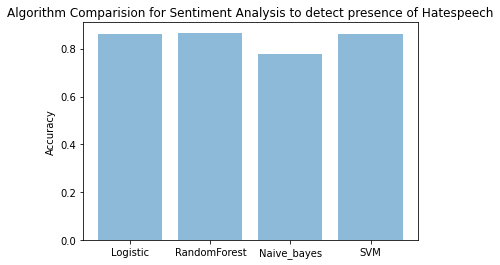

In [756]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [hate_acc,hate_acc1,hate_acc2,hate_acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for Sentiment Analysis to detect presence of Hatespeech')
plt.show()

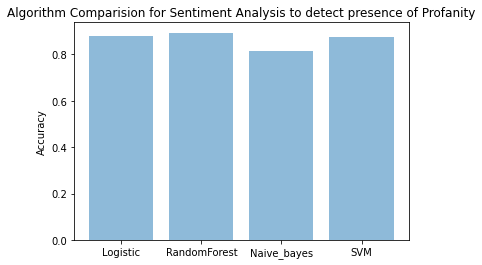

In [757]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [pro_acc,pro_acc1,pro_acc2,pro_acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for Sentiment Analysis to detect presence of Profanity')
plt.show()

**Doc2Vec**

In [758]:
# create doc2vec vector columns
# Initialize and train the model
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
#The input for a Doc2Vec model should be a list of TaggedDocument(['list','of','word'], [TAG_001]). 
#A good practice is using the indexes of sentences as the tags.
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(dataset["Processed Tweets"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
# window- The maximum distance between the current and predicted word within a sentence.
# mincount-Ignores all words with total frequency lower than this.
# workers -Use these many worker threads to train the model
#  Training Model - distributed bag of words (PV-DBOW) is employed.
model = Doc2Vec(documents,vector_size=5, window=2, min_count=1, workers=4)

#infer_vector - Infer a vector for given post-bulk training document.
# Syntax- infer_vector(doc_words, alpha=None, min_alpha=None, epochs=None, steps=None)
# doc_words-A document for which the vector representation will be inferred.

# transform each document into a vector data
doc2vec_df = dataset["Processed Tweets"].apply(lambda x: model.infer_vector(x.split(" "))).apply(panda.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
doc2vec_df

,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,-0.059108,0.010296,0.096675,0.002603,0.009164
1,0.113326,0.037924,-0.008320,0.080623,-0.084217
2,0.101653,0.008278,-0.017126,0.006452,-0.066599
3,0.039541,0.084263,-0.007935,-0.063706,-0.093770
4,0.101713,-0.080833,0.024799,0.079663,-0.084227
...,...,...,...,...,...
1492,0.067913,0.065829,0.101148,-0.035170,-0.042494
1493,0.063281,0.110257,0.077974,0.050536,0.045719
1494,0.060227,0.106441,0.016358,-0.126058,-0.110213
1495,0.127972,0.106626,0.100232,-0.056103,0.072568


In [759]:
# doc2vec columns
modelling_features2 = np.concatenate([doc2vec_df],axis=1)
modelling_features2.shape

(1497, 5)

In [760]:
X = panda.DataFrame(modelling_features2)
y = dataset['Hatespeech'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = LogisticRegression().fit(X_train_bow,y_train)
y_preds = model.predict(X_test_bow)
report = classification_report( y_test, y_preds )
print(report)
hate_acc=accuracy_score(y_test,y_preds)
print("Logistic Regression with doc2vec to detect presence of Hatespeech, Accuracy Score:" , hate_acc)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       259
           1       0.00      0.00      0.00        41

    accuracy                           0.86       300
   macro avg       0.43      0.50      0.46       300
weighted avg       0.75      0.86      0.80       300

Logistic Regression with doc2vec to detect presence of Hatespeech, Accuracy Score: 0.8633333333333333


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [761]:
X = panda.DataFrame(modelling_features2)
y = dataset['Profanity'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = LogisticRegression().fit(X_train_bow,y_train)
y_preds = model.predict(X_test_bow)
report = classification_report( y_test, y_preds )
print(report)
pro_acc=accuracy_score(y_test,y_preds)
print("Logistic Regression with doc2vec to detect presence of Profanity, Accuracy Score:" , pro_acc)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       263
           1       0.00      0.00      0.00        37

    accuracy                           0.88       300
   macro avg       0.44      0.50      0.47       300
weighted avg       0.77      0.88      0.82       300

Logistic Regression with doc2vec to detect presence of Profanity, Accuracy Score: 0.8766666666666667


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [762]:
X = panda.DataFrame(modelling_features2)
y = dataset['Hatespeech'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_bow,y_train)
y_preds = rf.predict(X_test_bow)
hate_acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest with doc2vec to detect presence of Hatespeech, Accuracy Score:",hate_acc1)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       259
           1       0.25      0.02      0.04        41

    accuracy                           0.86       300
   macro avg       0.56      0.51      0.48       300
weighted avg       0.78      0.86      0.80       300

Random Forest with doc2vec to detect presence of Hatespeech, Accuracy Score: 0.8566666666666667


In [763]:
X = panda.DataFrame(modelling_features2)
y = dataset['Profanity'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_bow,y_train)
y_preds = rf.predict(X_test_bow)
pro_acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest with doc2vec to detect presence of Profanity, Accuracy Score:",pro_acc1)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       263
           1       0.50      0.05      0.10        37

    accuracy                           0.88       300
   macro avg       0.69      0.52      0.52       300
weighted avg       0.83      0.88      0.83       300

Random Forest with doc2vec to detect presence of Profanity, Accuracy Score: 0.8766666666666667


In [764]:
X = panda.DataFrame(modelling_features2)
y = dataset['Hatespeech'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train,y_train)
y_preds = nb.predict(X_test)
hate_acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes with doc2vec to detect presence of Hatespeech, Accuracy Score:",hate_acc2)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       259
           1       0.50      0.05      0.09        41

    accuracy                           0.86       300
   macro avg       0.68      0.52      0.51       300
weighted avg       0.82      0.86      0.81       300

Naive Bayes with doc2vec to detect presence of Hatespeech, Accuracy Score: 0.8633333333333333


In [765]:
X = panda.DataFrame(modelling_features2)
y = dataset['Profanity'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train,y_train)
y_preds = nb.predict(X_test)
pro_acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes with doc2vec to detect presence of Profanity, Accuracy Score:",pro_acc2)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       263
           1       0.00      0.00      0.00        37

    accuracy                           0.88       300
   macro avg       0.44      0.50      0.47       300
weighted avg       0.77      0.88      0.82       300

Naive Bayes with doc2vec to detect presence of Profanity, Accuracy Score: 0.8766666666666667


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [766]:
X = panda.DataFrame(modelling_features2)
y = dataset['Hatespeech'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
support =LinearSVC(random_state=20)
support.fit(X_train_bow,y_train)
y_preds = support.predict(X_test_bow)
hate_acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM with doc2vec to detect presence of Hatespeech, Accuracy Score:" , hate_acc3)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       259
           1       0.00      0.00      0.00        41

    accuracy                           0.86       300
   macro avg       0.43      0.50      0.46       300
weighted avg       0.75      0.86      0.80       300

SVM with doc2vec to detect presence of Hatespeech, Accuracy Score: 0.8633333333333333


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [767]:
X = panda.DataFrame(modelling_features2)
y = dataset['Profanity'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
support =LinearSVC(random_state=20)
support.fit(X_train_bow,y_train)
y_preds = support.predict(X_test_bow)
pro_acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM with doc2vec to detect presence of Profanity, Accuracy Score:" , pro_acc3)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       263
           1       0.00      0.00      0.00        37

    accuracy                           0.88       300
   macro avg       0.44      0.50      0.47       300
weighted avg       0.77      0.88      0.82       300

SVM with doc2vec to detect presence of Profanity, Accuracy Score: 0.8766666666666667


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


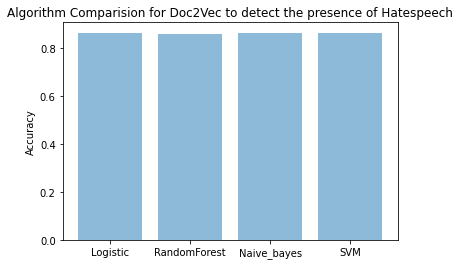

In [768]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [hate_acc,hate_acc1,hate_acc2,hate_acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for Doc2Vec to detect the presence of Hatespeech')
plt.show()

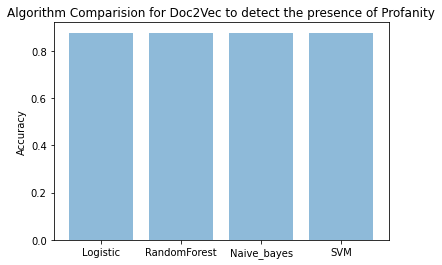

In [769]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [pro_acc,pro_acc1,pro_acc2,pro_acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for Doc2Vec to detect the presence of Profanity')
plt.show()

**All Features Combined Together**

In [770]:
modelling_features_combined = np.concatenate([bow_a,tfidf_a,final_features,doc2vec_df],axis=1)
modelling_features_combined.shape

(1497, 1523)

In [771]:
X = panda.DataFrame(modelling_features_combined)
y = dataset['Hatespeech'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = LogisticRegression().fit(X_train_bow,y_train)
y_preds = model.predict(X_test_bow)
report = classification_report( y_test, y_preds )
print(report)
hate_acc=accuracy_score(y_test,y_preds)
print("Logistic Regression with All Features Combined to detect presence of Hatespeech, Accuracy Score:" , hate_acc)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       259
           1       0.56      0.22      0.32        41

    accuracy                           0.87       300
   macro avg       0.72      0.60      0.62       300
weighted avg       0.84      0.87      0.84       300

Logistic Regression with All Features Combined to detect presence of Hatespeech, Accuracy Score: 0.87


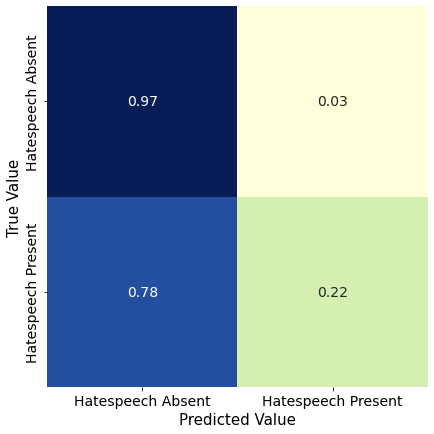

In [772]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hatespeech Absent','Hatespeech Present']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(7,7))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 14},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=15)
plt.xlabel(r'Predicted Value',fontsize=15)
plt.tick_params(labelsize=14)

In [773]:
X = panda.DataFrame(modelling_features_combined)
y = dataset['Profanity'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = LogisticRegression().fit(X_train_bow,y_train)
y_preds = model.predict(X_test_bow)
report = classification_report( y_test, y_preds )
print(report)
pro_acc=accuracy_score(y_test,y_preds)
print("Logistic Regression with All Features Combined to detect presence of Profanity, Accuracy Score:" , pro_acc)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       263
           1       0.86      0.51      0.64        37

    accuracy                           0.93       300
   macro avg       0.90      0.75      0.80       300
weighted avg       0.93      0.93      0.92       300

Logistic Regression with All Features Combined to detect presence of Profanity, Accuracy Score: 0.93


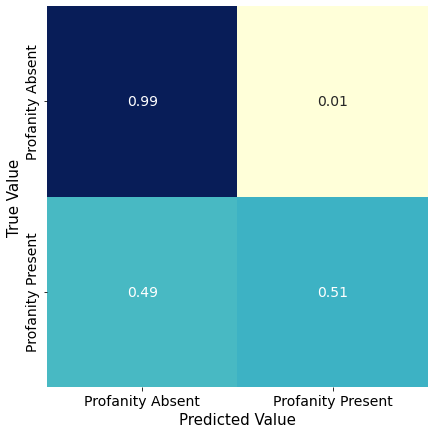

In [774]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Profanity Absent','Profanity Present']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(7,7))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 14},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=15)
plt.xlabel(r'Predicted Value',fontsize=15)
plt.tick_params(labelsize=14)

In [775]:
X = panda.DataFrame(modelling_features_combined)
y = dataset['Hatespeech'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_bow,y_train)
y_preds = rf.predict(X_test_bow)
hate_acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest with All Features Combined to detect presence of Hatespeech, Accuracy Score:",hate_acc1)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       259
           1       0.73      0.27      0.39        41

    accuracy                           0.89       300
   macro avg       0.81      0.63      0.67       300
weighted avg       0.87      0.89      0.86       300

Random Forest with All Features Combined to detect presence of Hatespeech, Accuracy Score: 0.8866666666666667


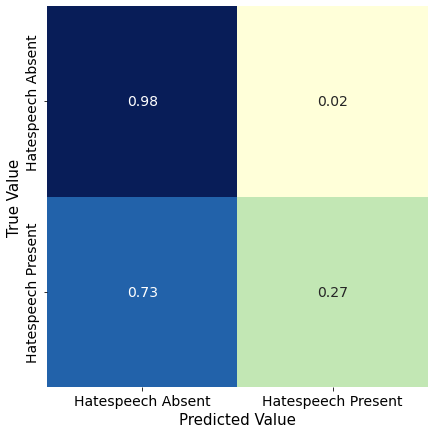

In [776]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hatespeech Absent','Hatespeech Present']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(7,7))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 14},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=15)
plt.xlabel(r'Predicted Value',fontsize=15)
plt.tick_params(labelsize=14)

In [777]:
X = panda.DataFrame(modelling_features_combined)
y = dataset['Profanity'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_bow,y_train)
y_preds = rf.predict(X_test_bow)
pro_acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest with All Features Combined to detect presence of Profanity, Accuracy Score:",pro_acc1)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       263
           1       0.92      0.59      0.72        37

    accuracy                           0.94       300
   macro avg       0.93      0.79      0.84       300
weighted avg       0.94      0.94      0.94       300

Random Forest with All Features Combined to detect presence of Profanity, Accuracy Score: 0.9433333333333334


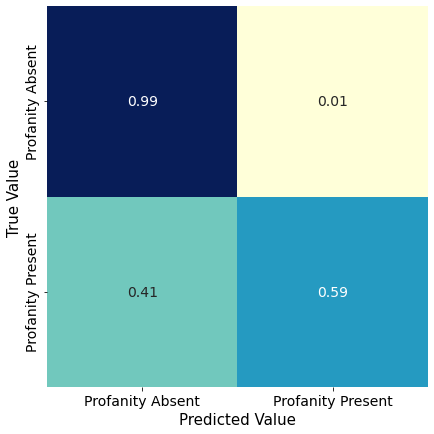

In [778]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Profanity Absent','Profanity Present']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(7,7))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 14},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=15)
plt.xlabel(r'Predicted Value',fontsize=15)
plt.tick_params(labelsize=14)

In [779]:
X = panda.DataFrame(modelling_features_combined)
y = dataset['Hatespeech'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train,y_train)
y_preds = nb.predict(X_test)
hate_acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes with All Features Combined to detect presence of Hatespeech, Accuracy Score:",hate_acc2)

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       259
           1       0.17      0.39      0.24        41

    accuracy                           0.66       300
   macro avg       0.52      0.54      0.51       300
weighted avg       0.78      0.66      0.70       300

Naive Bayes with All Features Combined to detect presence of Hatespeech, Accuracy Score: 0.6566666666666666


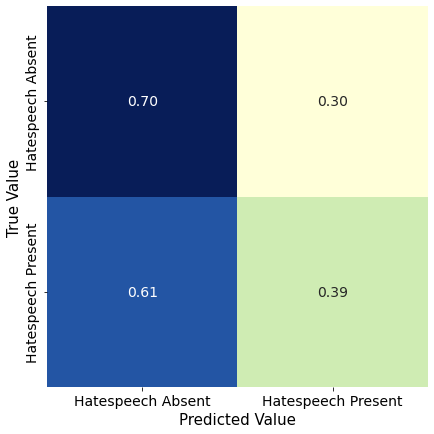

In [780]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hatespeech Absent','Hatespeech Present']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(7,7))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 14},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=15)
plt.xlabel(r'Predicted Value',fontsize=15)
plt.tick_params(labelsize=14)

In [781]:
X = panda.DataFrame(modelling_features_combined)
y = dataset['Profanity'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train,y_train)
y_preds = nb.predict(X_test)
pro_acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes with All Features Combined to detect presence of Profanity, Accuracy Score:",pro_acc2)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       263
           1       0.18      0.41      0.25        37

    accuracy                           0.70       300
   macro avg       0.54      0.57      0.53       300
weighted avg       0.81      0.70      0.74       300

Naive Bayes with All Features Combined to detect presence of Profanity, Accuracy Score: 0.6966666666666667


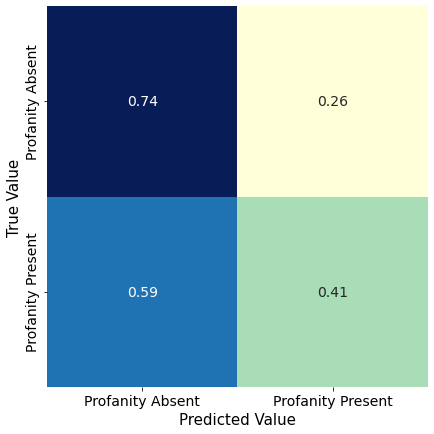

In [782]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Profanity Absent','Profanity Present']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(7,7))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 14},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=15)
plt.xlabel(r'Predicted Value',fontsize=15)
plt.tick_params(labelsize=14)

In [783]:
X = panda.DataFrame(modelling_features_combined)
y = dataset['Hatespeech'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
support =LinearSVC(random_state=20)
support.fit(X_train_bow,y_train)
y_preds = support.predict(X_test_bow)
hate_acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM with All Features Combined to detect presence of Hatespeech, Accuracy Score:" , hate_acc3)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       259
           1       0.58      0.44      0.50        41

    accuracy                           0.88       300
   macro avg       0.75      0.69      0.72       300
weighted avg       0.87      0.88      0.87       300

SVM with All Features Combined to detect presence of Hatespeech, Accuracy Score: 0.88


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


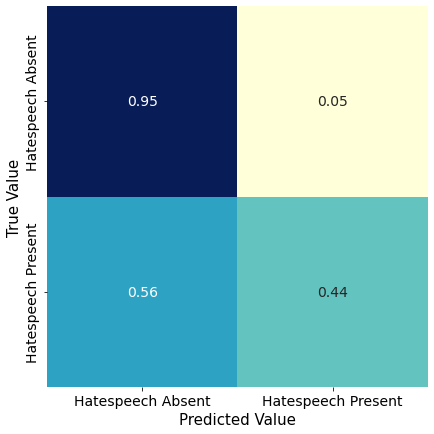

In [784]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hatespeech Absent','Hatespeech Present']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(7,7))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 14},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=15)
plt.xlabel(r'Predicted Value',fontsize=15)
plt.tick_params(labelsize=14)

In [785]:
X = panda.DataFrame(modelling_features_combined)
y = dataset['Profanity'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
support =LinearSVC(random_state=20)
support.fit(X_train_bow,y_train)
y_preds = support.predict(X_test_bow)
pro_acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM with All Features Combined to detect presence of Profanity, Accuracy Score:" , pro_acc3)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       263
           1       0.89      0.68      0.77        37

    accuracy                           0.95       300
   macro avg       0.92      0.83      0.87       300
weighted avg       0.95      0.95      0.95       300

SVM with All Features Combined to detect presence of Profanity, Accuracy Score: 0.95


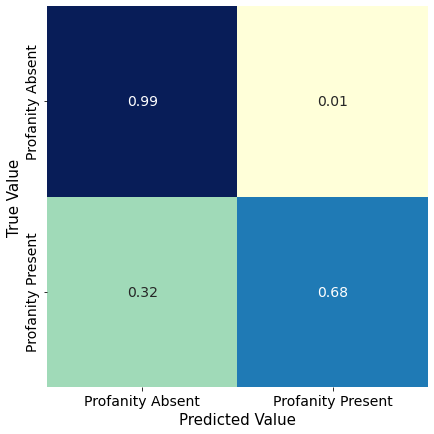

In [786]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Profanity Absent','Profanity Present']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(7,7))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 14},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=15)
plt.xlabel(r'Predicted Value',fontsize=15)
plt.tick_params(labelsize=14)

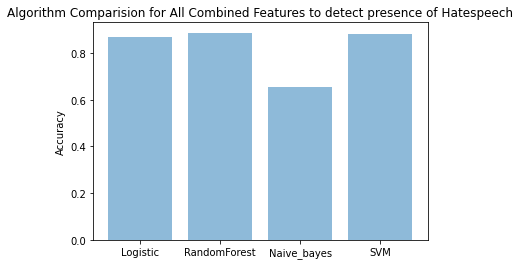

In [787]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [hate_acc,hate_acc1,hate_acc2,hate_acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for All Combined Features to detect presence of Hatespeech')
plt.show()

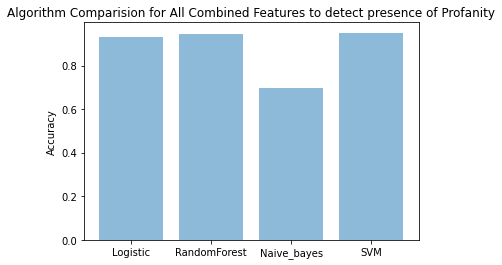

In [788]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [pro_acc,pro_acc1,pro_acc2,pro_acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for All Combined Features to detect presence of Profanity')
plt.show()

**Word2Vec**

In [789]:
X_data, y_data = np.array(dataset['Processed Tweets']), np.array(dataset['Hatespeech'])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size = 0.20, random_state = 42)
print('Data Split done.')

Data Split done.


In [790]:
from gensim.models import Word2Vec

Embedding_dimensions = 100

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [791]:
# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 410


In [792]:
# Defining the model input length.
input_length = 35

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [793]:
tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data)
vocab_length = len(tokenizer.word_index) + 1
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 2817


In [794]:
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test) , maxlen=input_length)

In [795]:
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (2817, 100)


In [796]:
class Attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(Attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [797]:
model_word2vec=Sequential()
model_word2vec.add(Embedding(vocab_length, Embedding_dimensions, input_length=input_length, weights=[embedding_matrix], trainable=True))
model_word2vec.add(Bidirectional(LSTM(100, return_sequences=True)))
model_word2vec.add(Attention(return_sequences=False)) # receive 3D and output 3D
model_word2vec.add(Dense(1,activation='sigmoid'))
model_word2vec.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_word2vec.summary())

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_38 (Embedding)     (None, 35, 100)           281700    
_________________________________________________________________
bidirectional_29 (Bidirectio (None, 35, 200)           160800    
_________________________________________________________________
attention_29 (Attention)     (None, 200)               235       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 201       
Total params: 442,936
Trainable params: 442,936
Non-trainable params: 0
_________________________________________________________________
None


In [798]:
## Fit train data
model_word2vec.fit(X_train, y_train, epochs = 10)

Epoch 1/10
38/38 [==============================] - 5s 44ms/step - loss: 0.5299 - accuracy: 0.8609
Epoch 2/10
38/38 [==============================] - 2s 43ms/step - loss: 0.3116 - accuracy: 0.8892
Epoch 3/10
38/38 [==============================] - 2s 44ms/step - loss: 0.1513 - accuracy: 0.9540
Epoch 4/10
38/38 [==============================] - 2s 45ms/step - loss: 0.1018 - accuracy: 0.9694
Epoch 5/10
38/38 [==============================] - 2s 43ms/step - loss: 0.0676 - accuracy: 0.9795
Epoch 6/10
38/38 [==============================] - 2s 44ms/step - loss: 0.0777 - accuracy: 0.9761
Epoch 7/10
38/38 [==============================] - 2s 44ms/step - loss: 0.0669 - accuracy: 0.9801
Epoch 8/10
38/38 [==============================] - 2s 51ms/step - loss: 0.0619 - accuracy: 0.9841
Epoch 9/10
38/38 [==============================] - 2s 44ms/step - loss: 0.0567 - accuracy: 0.9835
Epoch 10/10
38/38 [==============================] - 2s 44ms/step - loss: 0.0599 - accuracy: 0.9805


In [799]:
y_pred=model_word2vec.predict_classes(X_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [800]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[239  20]
 [ 24  17]]


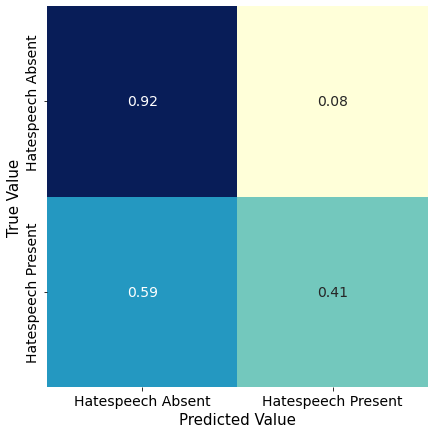

In [801]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hatespeech Absent','Hatespeech Present']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(7,7))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 14},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=15)
plt.xlabel(r'Predicted Value',fontsize=15)
plt.tick_params(labelsize=14)

In [802]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       259
           1       0.46      0.41      0.44        41

    accuracy                           0.85       300
   macro avg       0.68      0.67      0.68       300
weighted avg       0.85      0.85      0.85       300



**GLOVE**

In [803]:
embeddings_index = dict()
f = open('../input/glove-text/glove.6B.50d.txt','r', encoding='UTF-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

In [804]:
max_length = dataset['Processed Tweets'].apply(lambda x: len(x.split())).max()

t = Tokenizer()
t.fit_on_texts(dataset['Processed Tweets'])
vocab_size = len(t.word_index) + 2
X_data = t.texts_to_sequences(dataset['Processed Tweets'])
X_data = pad_sequences(X_data, maxlen=max_length, padding='post')

vocab_size = len(t.word_index) + 2

In [805]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, stratify=y_data)

In [806]:
model_glove=Sequential()
model_glove.add(Embedding(vocab_size, 100, input_length=max_length, weights=[embedding_matrix], trainable=True))
model_glove.add(Bidirectional(LSTM(100, return_sequences=True)))
model_glove.add(Attention(return_sequences=False)) # receive 3D and output 3D
model_glove.add(Dense(1,activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_glove.summary())

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_39 (Embedding)     (None, 34, 100)           281700    
_________________________________________________________________
bidirectional_30 (Bidirectio (None, 34, 200)           160800    
_________________________________________________________________
attention_30 (Attention)     (None, 200)               234       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 201       
Total params: 442,935
Trainable params: 442,935
Non-trainable params: 0
_________________________________________________________________
None


In [807]:
y_pred=model_glove.predict_classes(X_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [808]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[117 147]
 [ 12  24]]


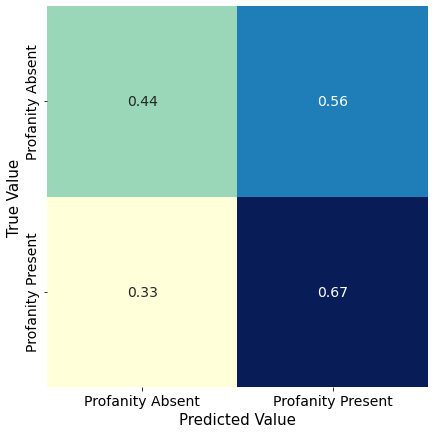

In [809]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Profanity Absent','Profanity Present']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(7,7))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 14},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=15)
plt.xlabel(r'Predicted Value',fontsize=15)
plt.tick_params(labelsize=14)

In [810]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.44      0.60       264
           1       0.14      0.67      0.23        36

    accuracy                           0.47       300
   macro avg       0.52      0.55      0.41       300
weighted avg       0.81      0.47      0.55       300



**Word2Vec**

In [811]:

X_data, y_data = np.array(dataset['Processed Tweets']), np.array(dataset['Profanity'])


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size = 0.20, random_state = 42)
print('Data Split done.')

Data Split done.


In [812]:
from gensim.models import Word2Vec

Embedding_dimensions = 100

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [813]:
# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 410


In [814]:
# Defining the model input length.
input_length = 35

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [815]:
tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data)
vocab_length = len(tokenizer.word_index) + 1
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 2817


In [816]:
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test) , maxlen=input_length)

In [817]:
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (2817, 100)


In [818]:
class Attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(Attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [819]:
model_word2vec=Sequential()
model_word2vec.add(Embedding(vocab_length, Embedding_dimensions, input_length=input_length, weights=[embedding_matrix], trainable=True))
model_word2vec.add(Bidirectional(LSTM(100, return_sequences=True)))
model_word2vec.add(Attention(return_sequences=False)) # receive 3D and output 3D
model_word2vec.add(Dense(1,activation='sigmoid'))
model_word2vec.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_word2vec.summary())

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 35, 100)           281700    
_________________________________________________________________
bidirectional_31 (Bidirectio (None, 35, 200)           160800    
_________________________________________________________________
attention_31 (Attention)     (None, 200)               235       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 201       
Total params: 442,936
Trainable params: 442,936
Non-trainable params: 0
_________________________________________________________________
None


In [820]:
model_word2vec.fit(X_train, y_train, epochs=10)

Epoch 1/10
38/38 [==============================] - 5s 44ms/step - loss: 0.5238 - accuracy: 0.8663
Epoch 2/10
38/38 [==============================] - 2s 44ms/step - loss: 0.3238 - accuracy: 0.8789
Epoch 3/10
38/38 [==============================] - 2s 44ms/step - loss: 0.0681 - accuracy: 0.9795
Epoch 4/10
38/38 [==============================] - 2s 44ms/step - loss: 0.0537 - accuracy: 0.9854
Epoch 5/10
38/38 [==============================] - 2s 44ms/step - loss: 0.0470 - accuracy: 0.9902
Epoch 6/10
38/38 [==============================] - 2s 44ms/step - loss: 0.0539 - accuracy: 0.9875
Epoch 7/10
38/38 [==============================] - 2s 47ms/step - loss: 0.0333 - accuracy: 0.9919
Epoch 8/10
38/38 [==============================] - 2s 48ms/step - loss: 0.0184 - accuracy: 0.9967
Epoch 9/10
38/38 [==============================] - 2s 44ms/step - loss: 0.0309 - accuracy: 0.9935
Epoch 10/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0272 - accuracy: 0.9951


In [821]:
y_pred=model_word2vec.predict_classes(X_test)

In [822]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[257   6]
 [ 20  17]]


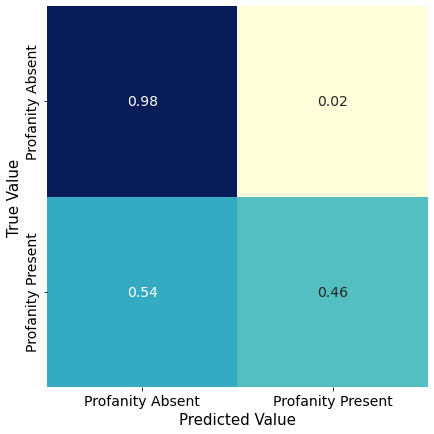

In [823]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Profanity Absent','Profanity Present']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(7,7))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 14},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=15)
plt.xlabel(r'Predicted Value',fontsize=15)
plt.tick_params(labelsize=14)

In [824]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       263
           1       0.74      0.46      0.57        37

    accuracy                           0.91       300
   macro avg       0.83      0.72      0.76       300
weighted avg       0.90      0.91      0.90       300



**Glove**

In [825]:
embeddings_index = dict()
f = open('../input/glove-text/glove.6B.50d.txt','r', encoding='UTF-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

In [826]:
max_length = dataset['Processed Tweets'].apply(lambda x: len(x.split())).max()

t = Tokenizer()
t.fit_on_texts(dataset['Processed Tweets'])
vocab_size = len(t.word_index) + 2
X_data = t.texts_to_sequences(dataset['Processed Tweets'])
X_data = pad_sequences(X_data, maxlen=max_length, padding='post')

vocab_size = len(t.word_index) + 2

In [827]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, stratify=y_data)

In [828]:
#embedding_vector_features=40
model_glove=Sequential()
model_glove.add(Embedding(vocab_size, 100, input_length=max_length, weights=[embedding_matrix], trainable=True))
model_glove.add(Bidirectional(LSTM(100, return_sequences=True)))
model_glove.add(Attention(return_sequences=False)) # receive 3D and output 3D
model_glove.add(Dense(1,activation='sigmoid'))
model_glove.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_glove.summary())

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_41 (Embedding)     (None, 34, 100)           281700    
_________________________________________________________________
bidirectional_32 (Bidirectio (None, 34, 200)           160800    
_________________________________________________________________
attention_32 (Attention)     (None, 200)               234       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 201       
Total params: 442,935
Trainable params: 442,935
Non-trainable params: 0
_________________________________________________________________
None


In [829]:
## Fit train data
model_glove.fit(X_train, y_train, epochs = 10)

Epoch 1/10
38/38 [==============================] - 5s 43ms/step - loss: 0.5332 - accuracy: 0.8704
Epoch 2/10
38/38 [==============================] - 2s 43ms/step - loss: 0.3078 - accuracy: 0.8869
Epoch 3/10
38/38 [==============================] - 2s 43ms/step - loss: 0.1159 - accuracy: 0.9576
Epoch 4/10
38/38 [==============================] - 2s 42ms/step - loss: 0.0621 - accuracy: 0.9830
Epoch 5/10
38/38 [==============================] - 2s 43ms/step - loss: 0.0333 - accuracy: 0.9908
Epoch 6/10
38/38 [==============================] - 2s 44ms/step - loss: 0.0272 - accuracy: 0.9925
Epoch 7/10
38/38 [==============================] - 2s 43ms/step - loss: 0.0273 - accuracy: 0.9935
Epoch 8/10
38/38 [==============================] - 2s 44ms/step - loss: 0.0360 - accuracy: 0.9899
Epoch 9/10
38/38 [==============================] - 2s 48ms/step - loss: 0.0398 - accuracy: 0.9925
Epoch 10/10
38/38 [==============================] - 2s 43ms/step - loss: 0.0341 - accuracy: 0.9918


In [830]:
y_pred=model_glove.predict_classes(X_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [831]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[260   6]
 [  8  26]]


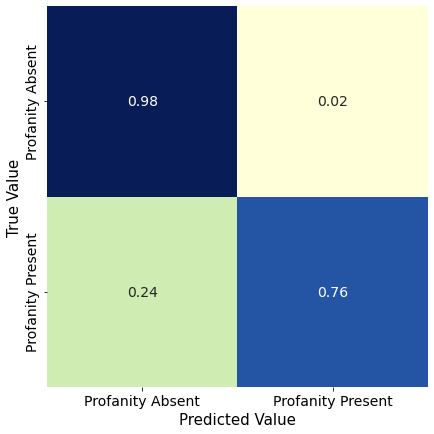

In [832]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Profanity Absent','Profanity Present']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(7,7))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 14},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=15)
plt.xlabel(r'Predicted Value',fontsize=15)
plt.tick_params(labelsize=14)

In [833]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       266
           1       0.81      0.76      0.79        34

    accuracy                           0.95       300
   macro avg       0.89      0.87      0.88       300
weighted avg       0.95      0.95      0.95       300

